# Feature Engineering

## Importing libraries

In [2]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import pickle
pd.set_option("display.max_columns", 120)

## Importing Datasets

In [3]:
dataset = pd.read_csv('data/cleaned_train_v2.csv', index_col=[0]) # I am removing unnamed column

dataset_test = pd.read_csv('data/cleaned_test_v2.csv', index_col=[0]) # I am removing unnamed column

/Users/sinalotfiomran/Fintechs_Capstone_Project/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/sinalotfiomran/Fintechs_Capstone_Project/.venv/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708337 entries, 0 to 1708336
Data columns (total 25 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   channelGrouping             object 
 1   date                        int64  
 2   fullVisitorId               object 
 3   visitId                     int64  
 4   visitNumber                 int64  
 5   visitStartTime              int64  
 6   device.browser              object 
 7   device.isMobile             int64  
 8   device.operatingSystem      object 
 9   geoNetwork.city             object 
 10  geoNetwork.country          object 
 11  geoNetwork.networkDomain    object 
 12  geoNetwork.region           object 
 13  totals.bounces              float64
 14  totals.hits                 int64  
 15  totals.newVisits            float64
 16  totals.pageviews            float64
 17  totals.transactionRevenue   float64
 18  trafficSource.adContent     object 
 19  trafficSource.campaig

In [5]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401589 entries, 0 to 401588
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   channelGrouping             401589 non-null  object 
 1   date                        401589 non-null  int64  
 2   fullVisitorId               401589 non-null  object 
 3   visitId                     401589 non-null  int64  
 4   visitNumber                 401589 non-null  int64  
 5   visitStartTime              401589 non-null  int64  
 6   device.browser              401589 non-null  object 
 7   device.isMobile             401589 non-null  int64  
 8   device.operatingSystem      401589 non-null  object 
 9   geoNetwork.city             401589 non-null  object 
 10  geoNetwork.country          401589 non-null  object 
 11  geoNetwork.networkDomain    401589 non-null  object 
 12  geoNetwork.region           401589 non-null  object 
 13  totals.bounces

### Dealing with PISOX time

In [6]:
# Converting POSIX data from visiStartTime column and replace it in date column
dataset['date'] = pd.to_datetime(dataset['visitStartTime'], unit='s').dt.strftime('%Y-%m-%d')
dataset = dataset.drop('visitStartTime', axis=1)

dataset_test['date'] = pd.to_datetime(dataset_test['visitStartTime'], unit='s').dt.strftime('%Y-%m-%d')
dataset_test = dataset_test.drop('visitStartTime', axis=1)

In [7]:
# Having separate columns for year, month and using new df
dataset = dataset.assign(
     Week = lambda x: pd.to_datetime(x['date']).dt.week,
     Year = lambda x: pd.to_datetime(x['date']).dt.year,
     Month = lambda x: pd.to_datetime(x['date']).dt.month
 )
print(f'Start of year: {dataset.Year.min()}')
print(f'Start of year: {dataset.Year.max()}')

dataset_test = dataset_test.assign(
     Week = lambda x: pd.to_datetime(x['date']).dt.week,
     Year = lambda x: pd.to_datetime(x['date']).dt.year,
     Month = lambda x: pd.to_datetime(x['date']).dt.month
 )
print(f'Start of year: {dataset_test.Year.min()}')
print(f'Start of year: {dataset_test.Year.max()}')


<ipython-input-7-83ad5702d9d9>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Week = lambda x: pd.to_datetime(x['date']).dt.week,
Start of year: 2016
Start of year: 2018
<ipython-input-7-83ad5702d9d9>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Week = lambda x: pd.to_datetime(x['date']).dt.week,
Start of year: 2018
Start of year: 2018


In [8]:
dataset.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,device.browser,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.country,geoNetwork.networkDomain,geoNetwork.region,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,Week,Year,Month
0,Organic Search,2017-10-17,3162355547410993243,1508198450,1,Firefox,0,Windows,not available in demo dataset,Germany,(not set),not available in demo dataset,1.0,1,1.0,1.0,0.0,None,(not set),False,water bottle,organic,(not provided),google,42,2017,10
1,Referral,2017-10-16,8934116514970143966,1508176307,6,Chrome,0,Chrome OS,Cupertino,United States,(not set),California,0.0,2,0.0,2.0,0.0,None,(not set),False,(not provided),referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,42,2017,10
2,Direct,2017-10-17,7992466427990357681,1508201613,1,Chrome,1,Android,not available in demo dataset,United States,windjammercable.net,not available in demo dataset,0.0,2,1.0,2.0,0.0,None,(not set),True,(not provided),(none),(not provided),(direct),42,2017,10
3,Organic Search,2017-10-16,9075655783635761930,1508169851,1,Chrome,0,Windows,not available in demo dataset,Turkey,unknown.unknown,not available in demo dataset,0.0,2,1.0,2.0,0.0,None,(not set),False,(not provided),organic,(not provided),google,42,2017,10
4,Organic Search,2017-10-16,6960673291025684308,1508190552,1,Chrome,0,Windows,not available in demo dataset,Mexico,prod-infinitum.com.mx,not available in demo dataset,0.0,2,1.0,2.0,0.0,None,(not set),False,(not provided),organic,(not provided),google,42,2017,10


In [9]:
dataset_test.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,device.browser,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.country,geoNetwork.networkDomain,geoNetwork.region,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,Week,Year,Month
0,Organic Search,2018-05-12,7460955084541987166,1526099341,2,Chrome,1,Android,(not set),India,unknown.unknown,Delhi,0.0,4,0.0,3.0,0.0,(not set),(not set),True,(not provided),organic,(not set),google,19,2018,5
1,Direct,2018-05-11,460252456180441002,1526064483,166,Chrome,0,Macintosh,San Francisco,United States,(not set),California,0.0,4,0.0,3.0,0.0,(not set),(not set),True,(not set),(none),(not set),(direct),19,2018,5
2,Organic Search,2018-05-11,3461808543879602873,1526067157,2,Chrome,0,Chrome OS,not available in demo dataset,United States,onlinecomputerworks.com,not available in demo dataset,0.0,4,0.0,3.0,0.0,(not set),(not set),True,(not provided),organic,(not set),google,19,2018,5
3,Direct,2018-05-12,975129477712150630,1526107551,4,Chrome,1,iOS,Houston,United States,(not set),Texas,0.0,5,0.0,4.0,0.0,(not set),(not set),True,(not set),(none),(not set),(direct),19,2018,5
4,Organic Search,2018-05-11,8381672768065729990,1526060254,1,Internet Explorer,1,Windows,Irvine,United States,com,California,0.0,5,1.0,4.0,0.0,(not set),(not set),False,(not provided),organic,(not set),google,19,2018,5


In [10]:
dataset.dtypes

channelGrouping                object
date                           object
fullVisitorId                  object
visitId                         int64
visitNumber                     int64
device.browser                 object
device.isMobile                 int64
device.operatingSystem         object
geoNetwork.city                object
geoNetwork.country             object
geoNetwork.networkDomain       object
geoNetwork.region              object
totals.bounces                float64
totals.hits                     int64
totals.newVisits              float64
totals.pageviews              float64
totals.transactionRevenue     float64
trafficSource.adContent        object
trafficSource.campaign         object
trafficSource.isTrueDirect       bool
trafficSource.keyword          object
trafficSource.medium           object
trafficSource.referralPath     object
trafficSource.source           object
Week                            int64
Year                            int64
Month       

# Categorical Features

In [11]:
categorical_cols = list()
for i in dataset.columns:
    if (dataset[i].dtype=='object' or dataset[i].dtype=='bool') and (not(i.startswith('total'))):
        categorical_cols.append(i)

### Removing Customers ID and Date from Categorical Columns

In [12]:
categorical_cols.remove('fullVisitorId')
categorical_cols.remove('date')

In [13]:
categorical_cols

['channelGrouping',
 'device.browser',
 'device.operatingSystem',
 'geoNetwork.city',
 'geoNetwork.country',
 'geoNetwork.networkDomain',
 'geoNetwork.region',
 'trafficSource.adContent',
 'trafficSource.campaign',
 'trafficSource.isTrueDirect',
 'trafficSource.keyword',
 'trafficSource.medium',
 'trafficSource.referralPath',
 'trafficSource.source']

# Numerical Features

In [14]:
numerical_cols = list()
for i in dataset.columns:
    if dataset[i].dtype not in ['object', 'bool']:
        numerical_cols.append(i)

In [15]:
numerical_cols

['visitId',
 'visitNumber',
 'device.isMobile',
 'totals.bounces',
 'totals.hits',
 'totals.newVisits',
 'totals.pageviews',
 'totals.transactionRevenue',
 'Week',
 'Year',
 'Month']

### Removing Year, Visits ID and Transaction Revenue from Numerical Columns

In [16]:
numerical_cols.remove('Year')

In [17]:
numerical_cols.remove('visitId')

In [18]:
numerical_cols.remove('totals.transactionRevenue')

### Adding "Average Hits per City" and  "Average Pageviews per City" to the Numerical Features

In [19]:
dataset['hits_mean_city'] = dataset.groupby('geoNetwork.city')['totals.hits'].transform('mean').astype('int')

dataset['pageviews_mean_city'] = dataset.groupby('geoNetwork.city')['totals.pageviews'].transform('mean').astype('int')

dataset_test['hits_mean_city'] = dataset_test.groupby('geoNetwork.city')['totals.hits'].transform('mean').astype('int')

dataset_test['pageviews_mean_city'] = dataset_test.groupby('geoNetwork.city')['totals.pageviews'].transform('mean').astype('int')

In [20]:
numerical_cols.append('hits_mean_city')
numerical_cols.append('pageviews_mean_city')

In [ ]:
numerical_cols

### Listing numerical features in a variable and changing it to float type

In [21]:
for col in numerical_cols:
    dataset[col] = dataset[col].astype('float')
    dataset_test[col] = dataset_test[col].astype('float')

## Label Encoding the Categorical Features

In [22]:
start_time = datetime.now()
# Listing categorical features in a variable and changing it to float.
for feature in categorical_cols:
    label_encoder = preprocessing.LabelEncoder() # initializing        label encoder object
    label_encoder.fit(list(dataset[feature].values.astype('str')) + list(dataset_test[feature].values.astype('str')))

# fit with list of variables in that feature
    dataset[feature] = label_encoder.transform(list(dataset[feature].values.astype('str'))) 
    dataset_test[feature] = label_encoder.transform(list(dataset_test[feature].values.astype('str'))) 

# transforming that feature
    print("for this feature : {0} label-encoding was done succesfully".format(feature))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

for this feature : channelGrouping label-encoding was done succesfully
for this feature : device.browser label-encoding was done succesfully
for this feature : device.operatingSystem label-encoding was done succesfully
for this feature : geoNetwork.city label-encoding was done succesfully
for this feature : geoNetwork.country label-encoding was done succesfully
for this feature : geoNetwork.networkDomain label-encoding was done succesfully
for this feature : geoNetwork.region label-encoding was done succesfully
for this feature : trafficSource.adContent label-encoding was done succesfully
for this feature : trafficSource.campaign label-encoding was done succesfully
for this feature : trafficSource.isTrueDirect label-encoding was done succesfully
for this feature : trafficSource.keyword label-encoding was done succesfully
for this feature : trafficSource.medium label-encoding was done succesfully
for this feature : trafficSource.referralPath label-encoding was done succesfully
for this 

### Checking the Dataset Features which dont belong to the Numerical and Categorical Features

In [23]:
set(dataset.columns)-set(numerical_cols+categorical_cols)

{'Year', 'date', 'fullVisitorId', 'totals.transactionRevenue', 'visitId'}

### Saving the Numerical and Categorical Features as Numpy Array

In [24]:
nrccl = np.array(numerical_cols)
np.save("data/Numerical_Columns", nrccl)
ctgcl = np.array(categorical_cols)
np.save("data/Categorical_Columns", ctgcl)

## HeatMap for Features Correlation

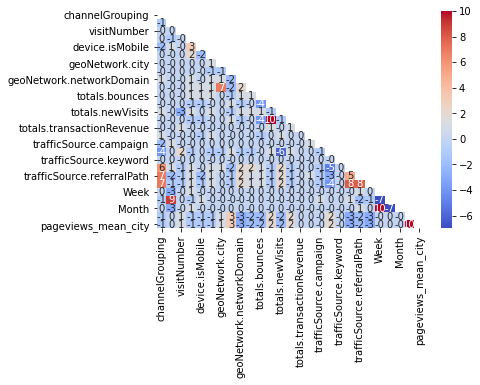

In [26]:
x_dum = dataset
mask = np.triu(x_dum.corr())
ax = sns.heatmap(round(x_dum.corr()*10,0), cmap="coolwarm", annot=True, mask=mask  )
x_dum.shape
plt.savefig('images/correlogram.png')

## Export the Datasets

In [27]:
# Save data to a new .csv file
path = 'data/feat_train_v2.csv'
dataset.to_csv(path)

In [28]:
# Save data to a new .csv file
path1 = 'data/feat_test_v2.csv'
dataset_test.to_csv(path1)